


# 🧩🧠💻💡 Challenge Telecom X: análise de evasão de clientes

# 📌 Extracão

In [1]:
# Importa a biblioteca pandas para manipulação de dados
import pandas as pd

In [2]:
# Define a URL onde está localizado o arquivo JSON com os dados da TelecomX
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

# Lê o arquivo JSON a partir da URL e armazena o conteúdo em um DataFrame
df_dados = pd.read_json(url)

# Exibe as primeiras linhas do DataFrame (com estrutura aninhada)
df_dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Normaliza a coluna 'customer', transformando os dados aninhados em um DataFrame plano
df_customer = pd.json_normalize(df_dados['customer'])

# Normaliza a coluna 'phone', transformando os dados aninhados em um DataFrame plano
df_phone = pd.json_normalize(df_dados['phone'])

# Normaliza a coluna 'internet', transformando os dados aninhados em um DataFrame plano
df_internet = pd.json_normalize(df_dados['internet'])

# Normaliza a coluna 'account', transformando os dados aninhados em um DataFrame plano
df_account = pd.json_normalize(df_dados['account'])

# Concatena os DataFrames normalizados com as colunas 'customerID' e 'Churn' em um único DataFrame
df_dados_normalizados = pd.concat([df_dados['customerID'],df_dados['Churn'],df_customer, df_phone, df_internet, df_account], axis=1)

# Exibe as primeiras linhas do DataFrame com todos os dados normalizados
df_dados_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

##Conhecendo o Dataset

**Dicionário de dados**

**customerID**: número de identificação único de cada cliente

**Churn**: se o cliente deixou ou não a empresa

**gender**: gênero (masculino e feminino)

**SeniorCitizen**: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

**Partner**: se o cliente possui ou não um parceiro ou parceira

**Dependents**: se o cliente possui ou não dependentes

**tenure**: meses de contrato do cliente

**PhoneService**: assinatura de serviço telefônico

**MultipleLines**: assisnatura de mais de uma linha de telefone

**InternetService**: assinatura de um provedor internet

**OnlineSecurity**: assinatura adicional de segurança online

**OnlineBackup**: assinatura adicional de backup online

**DeviceProtection**: assinatura adicional de proteção no dispositivo

**TechSupport**: assinatura adicional de suporte técnico, menos tempo de espera

**StreamingTV**: assinatura de TV a cabo

**StreamingMovies**: assinatura de streaming de filmes

**Contract**: tipo de contrato

**PaperlessBilling**: se o cliente prefere receber online a fatura

**PaymentMethod**: forma de pagamento

**Charges.Monthly**: total de todos os serviços do cliente por mês

**Charges.Total**: total gasto pelo cliente

In [4]:
# Exibe informações gerais do DataFrame, como colunas, tipos de dados e valores não nulos
df_dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [5]:
# Mostra o número de linhas e colunas do DataFrame
df_dados_normalizados.shape

(7267, 21)

##Verificando Inconsistências nos Dados

In [6]:
# Para cada coluna, imprime o número de valores distintos e a lista de valores únicos
for coluna in df_dados_normalizados.columns:
  print(f'{coluna}: {df_dados_normalizados[coluna].nunique()} - {df_dados_normalizados[coluna].unique()}')

customerID: 7267 - ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: 3 - ['No' 'Yes' '']
gender: 2 - ['Female' 'Male']
SeniorCitizen: 2 - [0 1]
Partner: 2 - ['Yes' 'No']
Dependents: 2 - ['Yes' 'No']
tenure: 73 - [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: 2 - ['Yes' 'No']
MultipleLines: 3 - ['No' 'Yes' 'No phone service']
InternetService: 3 - ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 - ['No' 'Yes' 'No internet service']
OnlineBackup: 3 - ['Yes' 'No' 'No internet service']
DeviceProtection: 3 - ['No' 'Yes' 'No internet service']
TechSupport: 3 - ['Yes' 'No' 'No internet service']
StreamingTV: 3 - ['Yes' 'No' 'No internet service']
StreamingMovies: 3 - ['No' 'Yes' 'No internet service']
Contract: 3 - ['One year' 'Month-to-month' 'Two year']
PaperlessBil

In [7]:
# Verifica a quantidade de valores nulos por coluna
valores_nulos = df_dados_normalizados.isnull().sum()
print('\n Quantidade de valores nulos por coluna')
print(valores_nulos[valores_nulos > 0])


 Quantidade de valores nulos por coluna
Series([], dtype: int64)


In [8]:
# Conta quantas linhas duplicadas existem no DataFrame
registros_duplicados = df_dados_normalizados.duplicated().sum()
print(f'Quantidade de registros duplicados: {registros_duplicados}')

Quantidade de registros duplicados: 0


In [9]:
# Conta quantos valores em branco ou apenas com espaços em cada coluna
valores_brancos_vazios = df_dados_normalizados.apply(lambda x: x.astype(str).str.strip() == "").sum()
print('\n Quantidade de valores brancos/vazios por coluna')
print(valores_brancos_vazios[valores_brancos_vazios > 0])


 Quantidade de valores brancos/vazios por coluna
Churn            224
Charges.Total     11
dtype: int64


In [10]:
# Converte a coluna Charges.Total para valores numéricos, substituindo erros por NaN
df_dados_normalizados['Charges.Total'] = pd.to_numeric(df_dados_normalizados['Charges.Total'], errors='coerce')

In [11]:
# Exibe as informações do DataFrame, com a coluna convertida
df_dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Tratando as Inconsistências

In [12]:
# Remove registros onde a coluna 'Churn' está vazia (string vazia)
registros_a_remover = df_dados_normalizados.query('Churn == ""').index
df_dados_normalizados.drop(registros_a_remover, axis = 0, inplace = True)

# Verifica se ainda restam registros com 'Churn' vazio
df_dados_normalizados.query('Churn == ""').index

Index([], dtype='int64')

In [13]:
# Substitui valores que indicam ausência de serviço por "No" (padronização das respostas)
df_dados_normalizados.MultipleLines = df_dados_normalizados.MultipleLines.replace('No phone service', 'No')
df_dados_normalizados.OnlineSecurity = df_dados_normalizados.OnlineSecurity.replace('No internet service', 'No')
df_dados_normalizados.OnlineBackup = df_dados_normalizados.OnlineBackup.replace('No internet service', 'No')
df_dados_normalizados.DeviceProtection = df_dados_normalizados.DeviceProtection.replace('No internet service', 'No')
df_dados_normalizados.TechSupport = df_dados_normalizados.TechSupport.replace('No internet service', 'No')
df_dados_normalizados.StreamingTV = df_dados_normalizados.StreamingTV.replace('No internet service', 'No')
df_dados_normalizados.StreamingMovies = df_dados_normalizados.StreamingMovies.replace('No internet service', 'No')

## Coluna de Contas Diárias

In [14]:
# Cria uma nova coluna "Charges.Daily" com a média diária de gastos por cliente
df_dados_normalizados['Charges.Daily'] = ((df_dados_normalizados['Charges.Total'] / df_dados_normalizados['tenure']) /30 ).round(2)

# Move a nova coluna para a posição 19 no DataFrame
df_dados_normalizados.insert(19, 'Charges.Daily', df_dados_normalizados.pop('Charges.Daily'))

In [15]:
# Exibe as primeiras linhas do DataFrame para verificação
df_dados_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


## Padronização e Transformação de Dados

In [16]:
# Convertendo variáveis categóricas com respostas 'Yes'/'No' para valores binários 1/0

# Lista de colunas
colunas_binarias = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling'
]

# Substitui valores usando atribuição direta com o map
for coluna in colunas_binarias:
    df_dados_normalizados[coluna] = df_dados_normalizados[coluna].map({'Yes': 1, 'No': 0}).astype(int)


In [17]:
# Tradução de algumas variáveis categóricas para português (útil para visualizações ou interpretação)
df_dados_normalizados['gender'] = df_dados_normalizados['gender'].map({'Female': 'feminino', 'Male': 'masculino'})
df_dados_normalizados['InternetService'] = df_dados_normalizados['InternetService'].map({'Fiber optic': 'fibra ótica', 'DSL': 'dsl', 'No': 'não'})
df_dados_normalizados['Contract'] = df_dados_normalizados['Contract'].map({'Month-to-month': 'mensal', 'Two year': '2 anos', 'One year': '1 ano'})
df_dados_normalizados['PaymentMethod'] = df_dados_normalizados['PaymentMethod'].map({'Electronic check': 'cheque eletrônico', 'Mailed check': 'cheque',
                                                'Bank transfer (automatic)': 'transferência bancária', 'Credit card (automatic)': 'cartão de crédito'})

In [18]:
# Renomeia as colunas do DataFrame para nomes em português mais descritivos.
df_dados_normalizados.rename(columns={
    'customerID': 'ID_Cliente',                        # Identificador único do cliente
    'gender': 'Genero',                                # Gênero do cliente
    'SeniorCitizen': 'Idoso',                          # Indica se o cliente é idoso
    'Partner': 'Parceiro',                             # Cliente tem cônjuge/parceiro
    'Dependents': 'Dependentes',                       # Cliente tem dependentes
    'tenure': 'Meses_Contrato',                        # Tempo de contrato em meses
    'PhoneService': 'Servico_Telefonico',              # Cliente possui serviço telefônico
    'MultipleLines': 'Assinatura_Multipla_Linha',      # Possui múltiplas linhas telefônicas
    'InternetService': 'Servico_Internet',             # Tipo de serviço de internet
    'OnlineSecurity': 'Seguranca_Online',              # Serviço de segurança online
    'OnlineBackup': 'Backup_Online',                   # Serviço de backup online
    'DeviceProtection': 'Protecao_Dispositivo',        # Proteção para dispositivos
    'TechSupport': 'Suporte_Tecnico',                  # Suporte técnico
    'StreamingTV': 'TV_Cabo',                          # Serviço de TV por assinatura
    'StreamingMovies': 'Streaming_Filmes',             # Serviço de streaming de filmes
    'Contract': 'Tipo_Contrato',                       # Tipo de contrato (mensal, 1 ano, 2 anos)
    'PaperlessBilling': 'Fatura_Online',               # Recebe fatura por meio digital
    'PaymentMethod': 'Forma_Pagamento',                # Método de pagamento
    'Charges.Daily': 'Gasto_Diario',                   # Gasto médio diário do cliente
    'Charges.Monthly': 'Gasto_Mensal',                 # Gasto mensal
    'Charges.Total': 'Gasto_Total'                     # Gasto total ao longo do contrato
}, inplace=True)

In [19]:
# Exibe as primeiras linhas do DataFrame para verificação
df_dados_normalizados.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Assinatura_Multipla_Linha,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,TV_Cabo,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Gasto_Diario,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,0,feminino,0,1,1,9,1,0,dsl,...,0,1,1,0,1 ano,1,cheque,2.20,65.6,593.30
1,0003-MKNFE,0,masculino,0,0,0,9,1,1,dsl,...,0,0,0,1,mensal,0,cheque,2.01,59.9,542.40
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0,fibra ótica,...,1,0,0,0,mensal,1,cheque eletrônico,2.34,73.9,280.85
3,0011-IGKFF,1,masculino,1,1,0,13,1,0,fibra ótica,...,1,0,1,1,mensal,1,cheque eletrônico,3.17,98.0,1237.85
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0,fibra ótica,...,0,1,1,0,mensal,1,cheque,2.97,83.9,267.40



#📊 Carga e análise

In [20]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Análise Descritiva

In [21]:
# Exibe estatísticas descritivas das colunas numéricas do DataFrame,
# como contagem (count), média (mean), desvio padrão (std),
# valor mínimo (min), quartis (25%, 50%, 75%) e valor máximo (max).
# Essa análise é útil para entender a distribuição e detectar possíveis
# outliers, erros ou variáveis com baixa variância.
df_dados_normalizados.describe()

,Churn,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Assinatura_Multipla_Linha,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,TV_Cabo,Streaming_Filmes,Fatura_Online,Gasto_Diario,Gasto_Mensal,Gasto_Total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7032.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,2.159879,64.761692,2283.300441
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,1.006217,30.090047,2266.771362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.460000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.207500,35.500000,401.450000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.350000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.010000,89.850000,3794.737500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.050000,118.750000,8684.800000


##Distribuição da Evasão

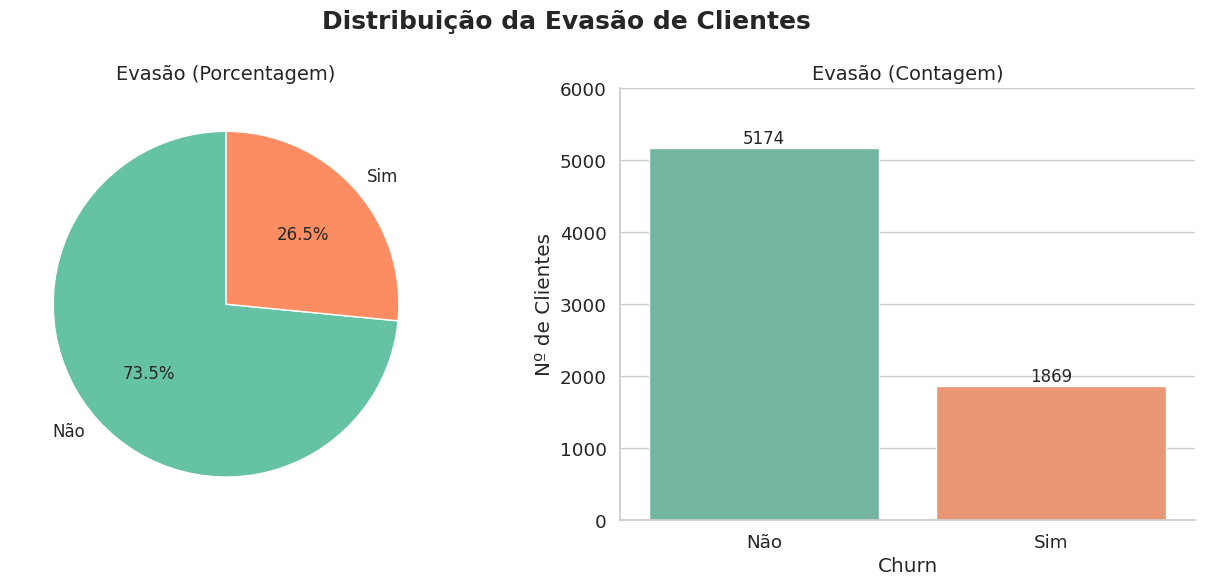

In [22]:
# Aplica o estilo visual do seaborn
sns.set(style='whitegrid', palette='pastel', font_scale=1.2)

# Cria figura com 2 subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Distribuição da Evasão de Clientes', fontsize=18, fontweight='bold')

# Conta a quantidade de churn (0 = Não, 1 = Sim)
churn_counts = df_dados_normalizados['Churn'].map({0: 'Não', 1: 'Sim'}).value_counts()
#churn_labels = churn_counts.index.tolist()
churn_labels = churn_counts.index

# Cores personalizadas
cores = sns.color_palette("Set2")

# Gráfico de pizza (à esquerda)
axs[0].pie(
    churn_counts,
    labels=churn_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    textprops={'fontsize': 12}
)
axs[0].set_title('Evasão (Porcentagem)', fontsize=14)

# Gráfico de barras (à direita)
sns.barplot(x=churn_labels, y=churn_counts.values, ax=axs[1], hue= churn_labels, palette=cores[:2])
axs[1].set_title('Evasão (Contagem)', fontsize=14)
axs[1].set_xlabel('Churn')
axs[1].set_ylabel('Nº de Clientes')
axs[1].set_ylim(0,6000)

# Adiciona valores no topo de cada barra
for i, valor in enumerate(churn_counts.values):
    axs[1].text(i, valor + 5, str(valor), ha='center', va='bottom', fontsize=12)

# Remove bordas desnecessárias no gráfico de barras
sns.despine()

# Salva a figura com boa resolução
plt.savefig('distribuicao_evasao.png', dpi=300, bbox_inches='tight')

# Exibe os gráficos
plt.tight_layout()
plt.show()

#📄Relatorio Final